<a href="https://colab.research.google.com/github/Piyush-004/Handwritten_Digit_Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HANDWRITTEN DIGIT RECOGNITION MODEL


---

First we start by importing the libraries.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

Then we will import the MNIST datasets then split it into train set and test set.

In [ ]:
mnsit = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnsit.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

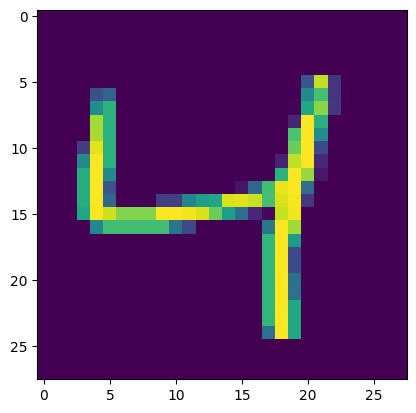

In [ ]:
plt.imshow(X_train[2])

In [ ]:
y_train[2]

4

We normalize the pixel values to a range of 0 to 1.

In [ ]:
X_train_normalize = tf.keras.utils.normalize(X_train, axis=1)
X_test_normalize = tf.keras.utils.normalize(X_test, axis=1)

We now convert the 2D array of 28x28 pixels into a 1D array of 784 pixels. It’s necessary to flatten the input before passing it to the dense layers.

In [ ]:
X_train_reshaped = X_train.reshape(len(X_train_normalize),28*28)
X_test_reshaped = X_test.reshape(len(X_test_normalize),28*28)

In [ ]:
X_train_reshaped.shape

(60000, 784)

In [ ]:
X_test_reshaped.shape

(10000, 784)

For the model, we will build 2 Hidden Layers, and 1 Output Layer.

1) Hidden Layers: Each of these layers contains 128 neurons and utilizes the ReLU activation function.

2) Output Layer: This layer consists of 10 neurons, each representing a digit from 0 to 9, and utilizes the Softmax activation function to obtain the probability for each digit.

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Now it’s time to compile our model. These are the parameters that we’ll be use:

**Optimizer**: We’ll be used Adam optimizer. Adam combines momentum optimization and RMSprop, making it a versatile and widely used optimizer in the deep learning community.

**Loss Function**: The loss function is a measure of how well the model performs during training. For classification problems with integer labels, sparse_categorical_crossentropy is a common choice. It calculates the cross-entropy loss between the predicted probabilities and the true labels.

**Metrics**: Accuracy is chosen as the evaluation metric for its interpretability and relevance in classification tasks. It represents the proportion of correctly classified instances, offering a straightforward measure of the model’s overall performance in terms of correct predictions.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Now we’ll train the model using the train set.

In [ ]:
model.fit(X_train_reshaped, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 1.5345 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2817 - accuracy: 0.9321
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1866 - accuracy: 0.9482
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1602 - accuracy: 0.9551
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1393 - accuracy: 0.9608


We can see that our model have 96.08% accuracy based on the train set. Now it’s time for us to evaluate the model to predict the test set.

In [ ]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1631 - accuracy: 0.9568


The accuracy of our model when used to predict the test set is 95.68%. This accuracy is considered quite good and stable when compared to the accuracy achieved on the training set.

In [ ]:
model.save('handwrittendigitrecognition.model')

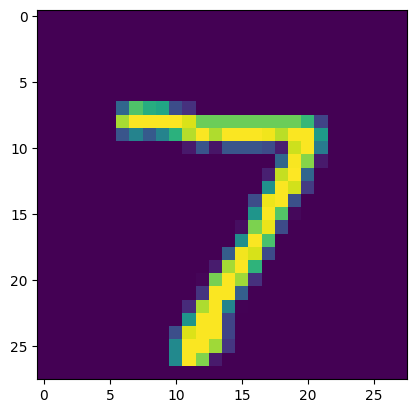

In [ ]:
plt.imshow(X_test[0])

In [ ]:
y_predict=model.predict(X_test_reshaped)
np.argmax(y_predict[0])

313/313 [==============================] - 1s 2ms/step


7

In [ ]:
y_labels=[np.argmax(i) for i in y_predict]

Now we create a confusion matrix to visualize our predictions.

A **confusion matrix** represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class.

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    0,    1,    1,    4,    4,    7,    3],
       [   0, 1125,    0,    2,    1,    2,    4,    1,    0,    0],
       [   4,    1,  993,    1,    7,    1,    3,   14,    7,    1],
       [   1,    1,   16,  931,    0,   19,    0,   13,   10,   19],
       [   1,    0,    4,    0,  966,    0,    1,    2,    0,    8],
       [  13,    0,    0,   11,    1,  841,    9,    3,    4,   10],
       [   8,    2,    2,    0,   12,   14,  917,    0,    3,    0],
       [   2,    7,   11,    0,    9,    2,    0,  985,    2,   10],
       [  19,    2,    9,    2,    8,   11,    3,    8,  900,   12],
       [   4,    3,    0,    7,   28,    3,    0,    9,    4,  951]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

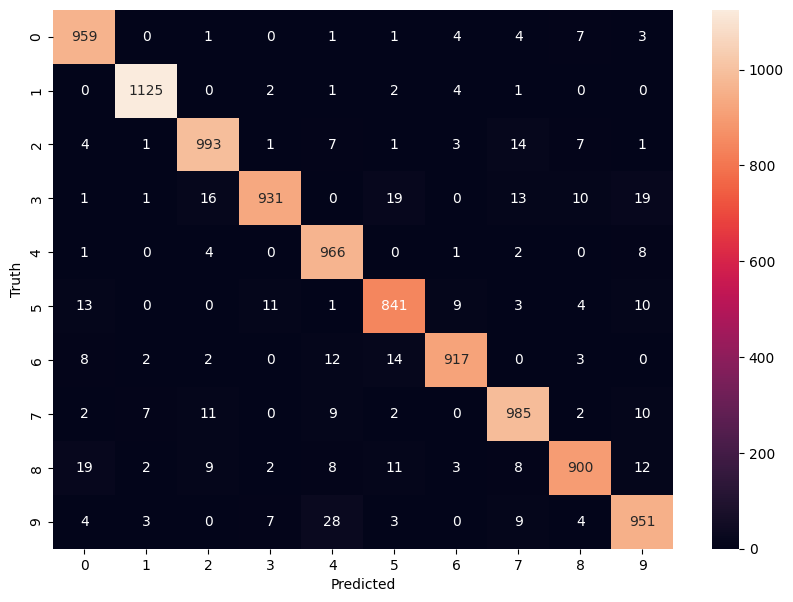

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')